In [1]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from xdesign import *
from skimage.exposure import adjust_gamma, rescale_intensity


def rescale(reconstruction, hi):
    I = rescale_intensity(reconstruction, out_range=(0., 1.))
    return adjust_gamma(I, 1, hi)

`polytope` failed to import `cvxopt.glpk`.
Will use `scipy.optimize.linprog`.


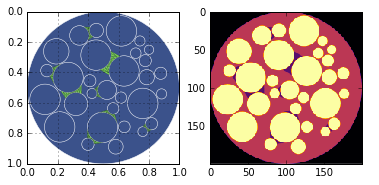

In [ ]:
wet = WetCircles()
sidebyside(wet, size=200)
plt.savefig('Wet_sidebyside.png', dpi='figure',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=0.0,
        frameon=False)
plt.show(block=True)

In [ ]:
sx, sy = 100, 100
sino, prb = sinogram(sx, sy, wet)

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(np.reshape(sino, (sx, sy)), cmap='gray', interpolation='nearest')
plt.show(block=True)

[##########] 100.00%
[##########] 100.00%
[##########] 100.00%


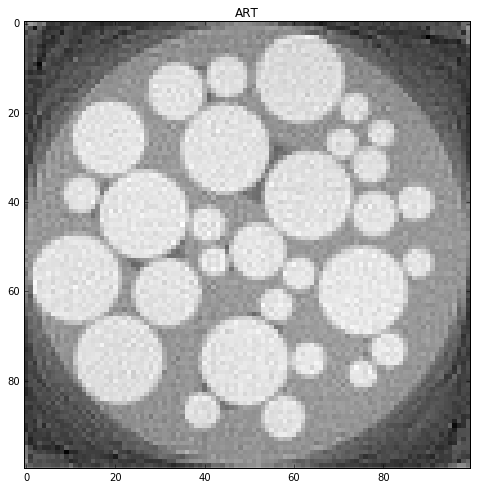

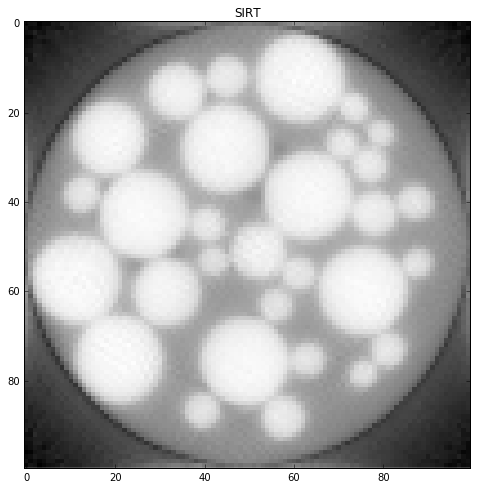

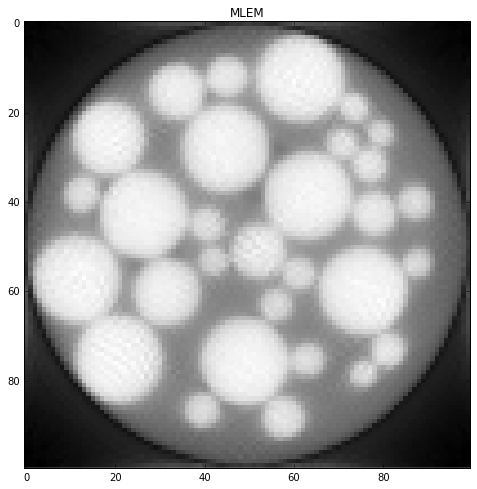

In [10]:
hi = 1
niter = 20
# Reconstruct object.
init = 1e-12 * np.ones((sx, sy))
rec_art = art(prb, sino, init, niter)
rec_art = rescale(np.rot90(rec_art)[::-1], hi)
plt.figure(figsize=(8, 8))
plt.imshow(rec_art, cmap='gray', interpolation='none')
plt.title('ART')

init = 1e-12 * np.ones((sx, sy))
rec_sirt = sirt(prb, sino, init, niter)
rec_sirt = rescale(np.rot90(rec_sirt)[::-1], hi)
plt.figure(figsize=(8, 8))
plt.imshow(rec_sirt, cmap='gray', interpolation='none')
plt.title('SIRT')

init = 1e-12 * np.ones((sx, sy))
rec_mlem = mlem(prb, sino, init, niter)
rec_mlem = rescale(np.rot90(rec_mlem)[::-1], hi)
plt.figure(figsize=(8, 8))
plt.imshow(rec_mlem, cmap='gray', interpolation='none')
plt.title('MLEM')
plt.show()